Column Details

* Date: The date of the record, in string format.
* Open: The opening price of DOGE-USD for the day (float).
* High: The highest price of DOGE-USD during the day (float).
* Low: The lowest price of DOGE-USD during the day (float).
* Close: The closing price of DOGE-USD for the day (float).
* Adj Close: The adjusted closing price, accounting for any corporate actions (float).
* Volume: The total volume of DOGE-USD traded during the day (float).



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df = pd.read_csv("/content/DOGE-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [ ]:
print(df.shape)
print(df.info())

(1761, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB
None


<Axes: >

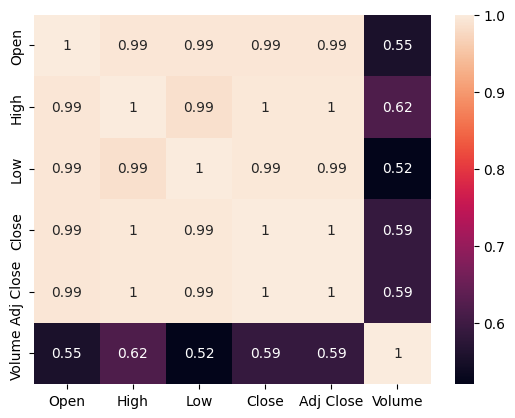

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

These columns are highly correlated hence we need to convert them into proper format for ML model.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)  #converting date column from string to datetime
df.set_index('Date', inplace=True)      # setting date column as index
df.isnull().sum()

<ipython-input-6-bd8a39dc9a7d>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)  #converting date column from string to datetime


,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


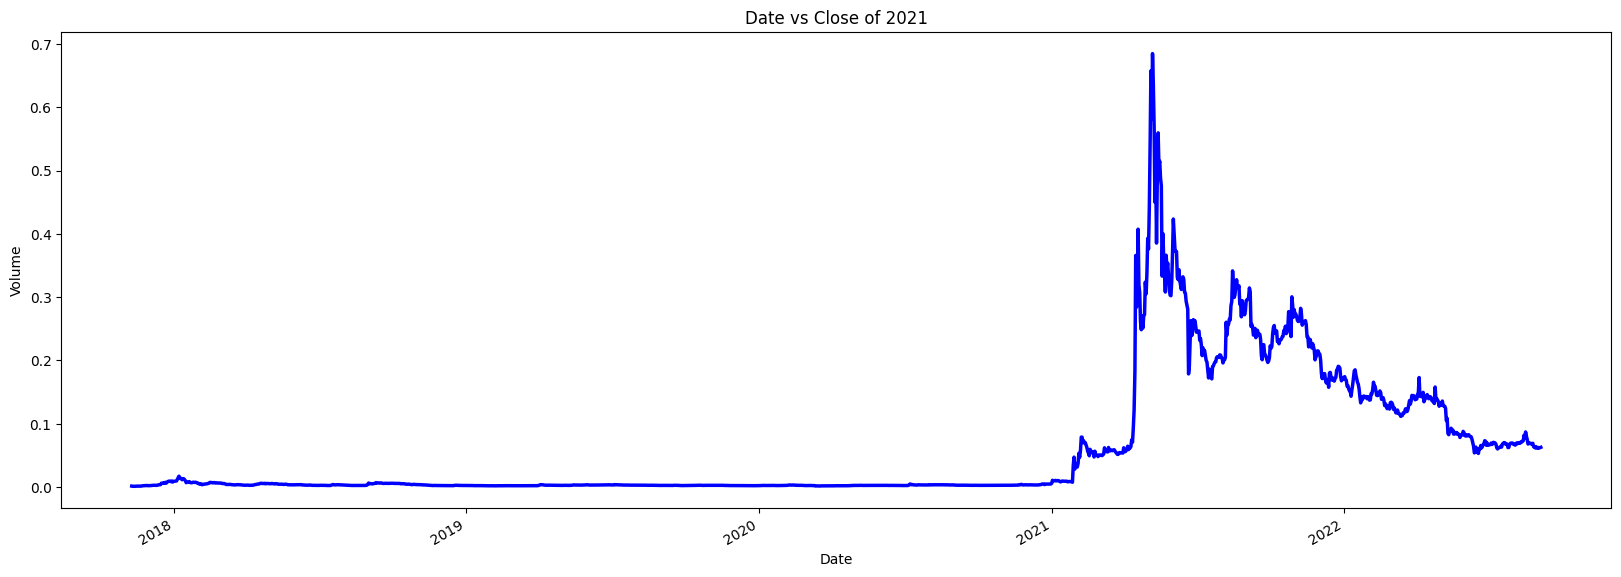

In [ ]:
plt.figure(figsize=(20,7))
x = df.groupby('Date')['Close'].mean()
x.plot(linewidth = 2.5, color='blue')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title('Date vs Close of 2021')
plt.show()

In [ ]:
#Making our hihly correlated data into machine feedable format
df['gap'] = (df['High'] - df['Low'])*df['Volume']
df['y'] = df['High']/df['Volume']
df['z'] = df['Low']/df['Volume']
df['a'] = df['High']/df['Low']
df['b'] = (df['Low']/df['Low'])*df['Volume']

<Axes: >

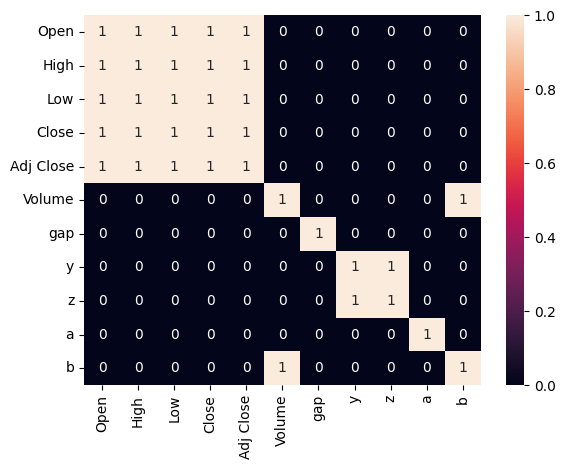

In [ ]:
sns.heatmap(df.corr()>0.9, annot=True)

Among all these columns we need to choose those which are not highly correlated for the ML Model.

In [ ]:
data = df[['Close','Volume','gap','a','b']]
data.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,6259550.0
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,4246520.0
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2231080.0
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3288960.0
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2481270.0


We will be using ARIMA model for Time Series Analysis.

ARIMA : Auto Agressive Integrated Moving Average.

It takes 3 arguments:


1.   p - Auto regression
2.   d - Integration
3.   q - Moving Average






In [ ]:
df2 = data.tail(30)
train = df2[:11]
test = df2[11:]
train.shape,test.shape

((11, 5), (19, 5))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(endog = train['Close'], exog=train.drop('Close',axis=1),order = (2,1,1))
res = model.fit()
print(res.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  30.949
Date:                Wed, 25 Dec 2024   AIC                            -45.899
Time:                        13:51:32   BIC                            -43.478
Sample:                    08-05-2022   HQIC                           -48.554
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      -5.29e-08   2.97e-13  -1.78e+05      0.000   -5.29e-08   -5.29e-08
gap         9.776e-10   3.99e-11     24.488      0.000    8.99e-10    1.06e-09
a             -0.0512   3.41e-15   -1.5e+13      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
start, end = 11, 29
predictions = res.predict(start=start,end=end,exog=test.drop('Close',axis=1))
predictions

,predicted_mean
2022-08-16,0.088478
2022-08-17,0.078119
2022-08-18,0.075650
2022-08-19,0.076876
2022-08-20,0.075662
2022-08-21,0.075650
2022-08-22,0.075232
2022-08-23,0.075942
2022-08-24,0.075874
2022-08-25,0.075441


<Axes: xlabel='Date'>

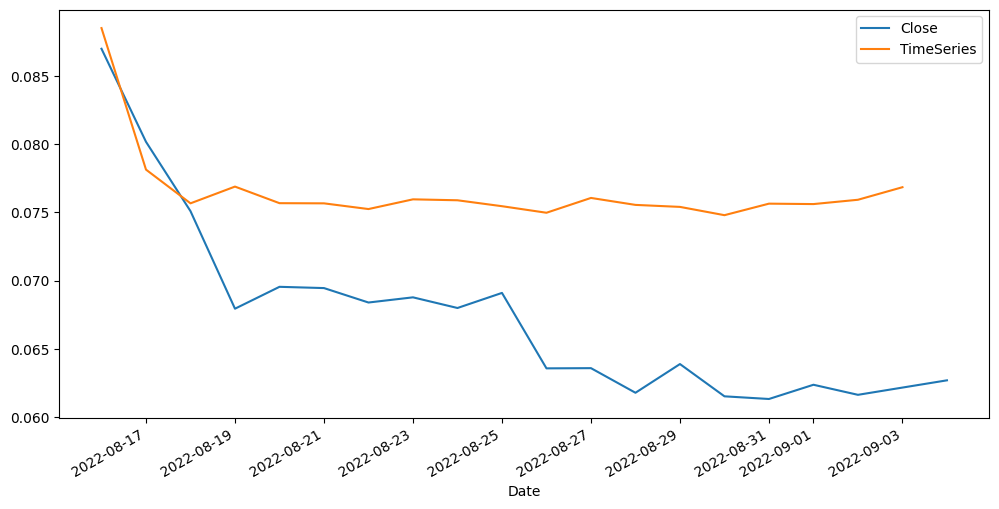

In [ ]:
test['Close'].plot(legend = True, figsize=(12,6))
predictions.plot(label='TimeSeries',legend = True)

The curret graph shows the predicted vs the actual close value of the DOGE-USD.

We can see there is a slight variation, hence we can say this model is preforming pretty good.


Thank you for going through my work till the end. Feel free to get in touch if you have any doubt... :)